In [45]:
import pytensor
pytensor.config.cxx = ""

In [46]:
from physiokinematic.simulate import simulate
# Generate synthetic dataset
data = simulate(100, seed=7777)

In [47]:
data

,glong,glat,vlsr,e_vlsr,radius,true_te,te,e_te,line,e_line,...,line_freq,telescope,beam_area,Rgal,distance,log10_n,log10_q,log10_Rs,log10_em,kdar
0,345.182274,0.194613,-67.253706,1.0,238.540624,4432.665079,4432.665079,100.0,38.827049,0.1,...,8000.0,simulated,9178.029287,3.576736,4.990746,1.413323,48.676554,0.761302,3.888979,
1,352.721478,0.701524,-51.507040,1.0,31.363747,4202.785157,NaN,100.0,4.749306,0.1,...,8000.0,simulated,9178.029287,2.264456,10.115261,1.683108,47.493153,0.186979,3.854225,
2,348.177708,0.387963,-32.020507,1.0,68.621345,4714.401857,NaN,100.0,12.898871,0.1,...,8000.0,simulated,9178.029287,4.857460,12.553321,1.385787,48.199951,0.620792,3.693397,
3,326.772876,-0.567601,-37.736801,1.0,53.504426,6448.759349,6448.759349,100.0,4.756220,0.1,...,8000.0,simulated,9178.029287,6.463001,11.494940,1.464347,47.918107,0.474471,3.704195,
4,38.763233,0.568629,43.434386,1.0,86.423434,5626.177135,5626.177135,100.0,19.076180,0.1,...,8000.0,simulated,9178.029287,6.422751,10.255199,1.430174,48.325799,0.633150,3.794529,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,332.233204,0.276270,-28.146651,1.0,78.434025,5637.480860,NaN,100.0,6.945857,0.1,...,8000.0,simulated,9178.029287,6.594749,12.612660,1.229808,48.068273,0.680886,3.441532,
96,326.238322,-0.679475,-45.126843,1.0,217.629755,5434.764445,NaN,100.0,15.646738,0.1,...,8000.0,simulated,9178.029287,6.124623,2.676135,1.450364,47.819129,0.450801,3.652558,
97,92.920696,0.433595,-93.607851,1.0,56.601748,7500.516741,7500.516741,100.0,4.954249,0.1,...,8000.0,simulated,9178.029287,13.258462,10.037735,1.528993,47.944106,0.440040,3.799056,
98,71.530872,0.179833,-41.110020,1.0,74.087375,6384.153028,NaN,100.0,16.153337,0.1,...,8000.0,simulated,9178.029287,10.028535,8.957240,1.574785,48.238049,0.507493,3.958093,


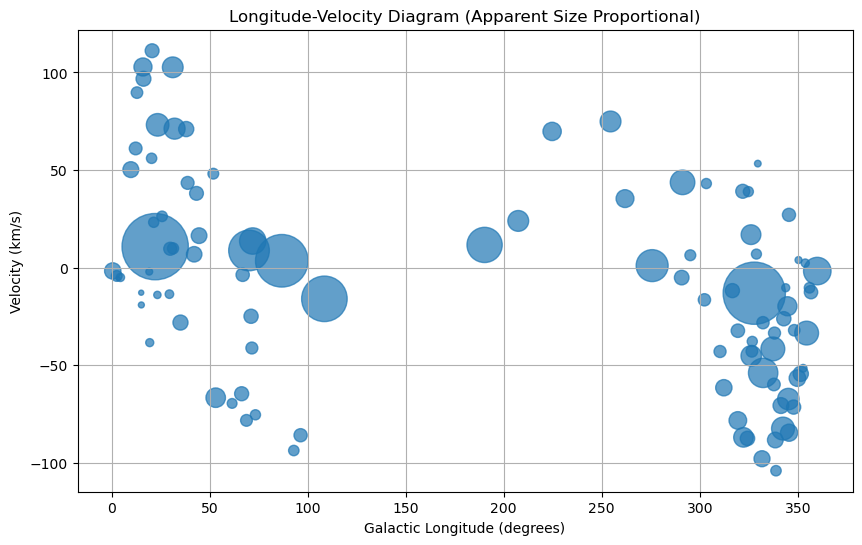

In [48]:
from physiokinematic import plot
plot.plot_longitude_velocity_diagram(data)

In [49]:
from physiokinematic import NEWmodel
import importlib
importlib.reload(NEWmodel)

<module 'physiokinematic.NEWmodel' from '/Users/ryanbakko/Desktop/Trey Research/physiokinematic/physiokinematic/NEWmodel.py'>

In [50]:
from physiokinematic.NEWmodel import model as pkmodel
# setup model
model = pkmodel(data)

/Users/ryanbakko/miniconda3/envs/physiokinematic/lib/python3.12/site-packages/pymc/model/core.py:1278: ImputationWarning: Data in te contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


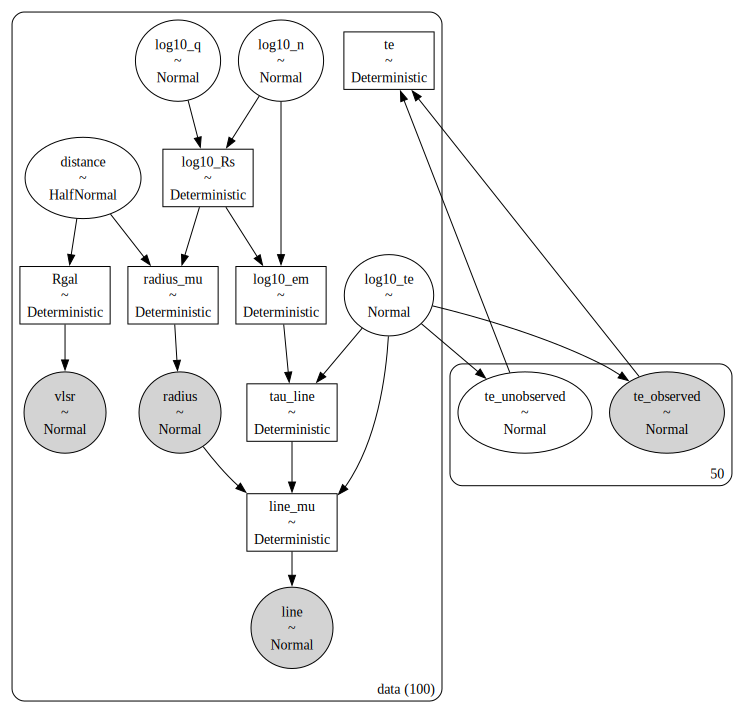

In [51]:
# visualize model
model.to_graphviz()

In [52]:
import pymc as pm

# sample prior predictive
with model:
    prior = pm.sample_prior_predictive(1000)

Sampling: [distance, line, log10_n, log10_q, log10_te, radius, te_observed, te_unobserved, vlsr]


(360.0, 0.0)

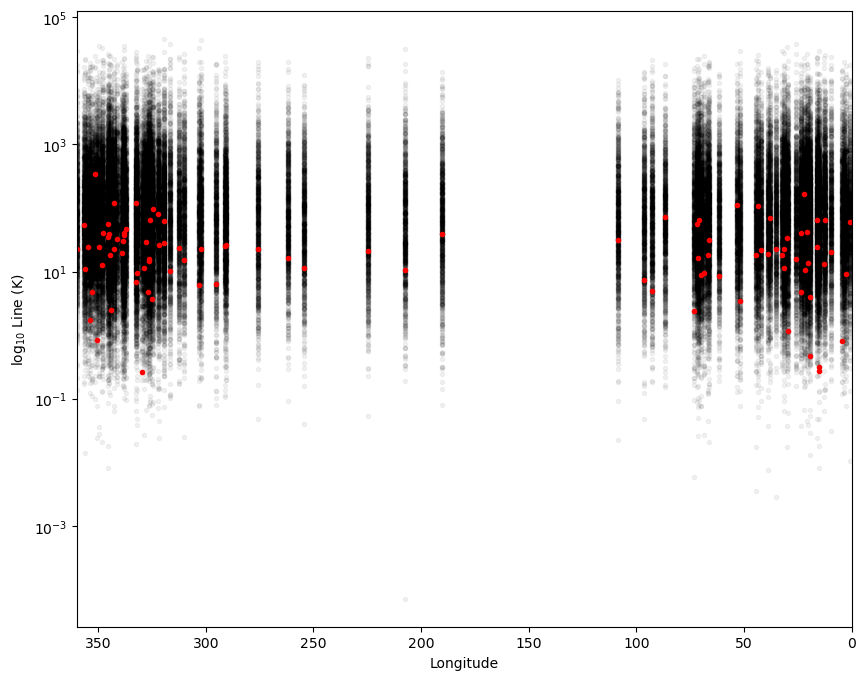

In [53]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots(figsize=(10, 8))
for draw in prior.prior_predictive.draw:
    ax.plot(
        data["glong"],
        prior.prior_predictive["line"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["line"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("log$_{10}$ Line (K)")
ax.set_yscale("log")
ax.set_xlim(360.0, 0.0)

(360.0, 0.0)

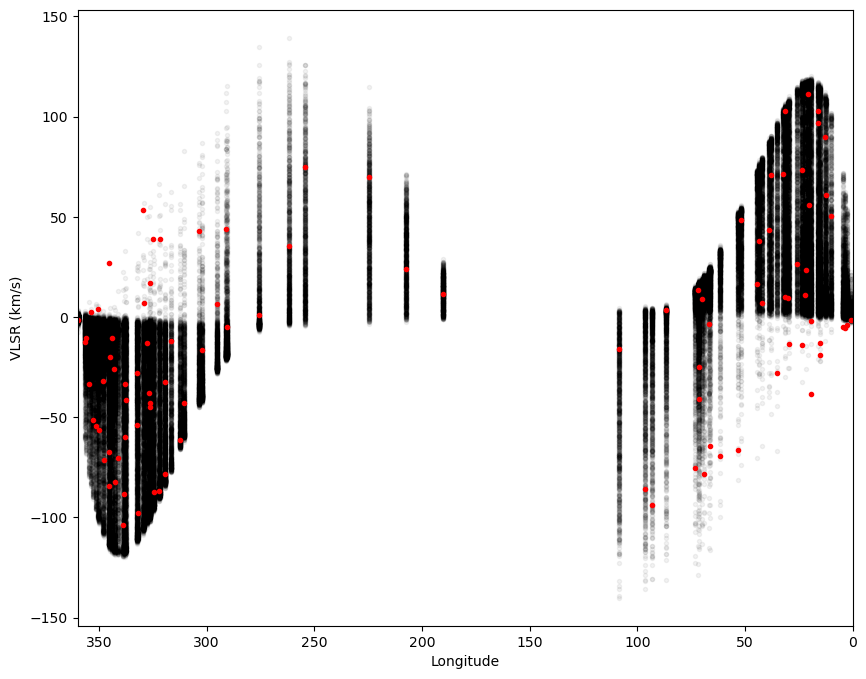

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in prior.prior_predictive.draw:
    ax.plot(
        data["glong"],
        prior.prior_predictive["vlsr"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["vlsr"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("VLSR (km/s)")
ax.set_xlim(360.0, 0.0)


(360.0, 0.0)

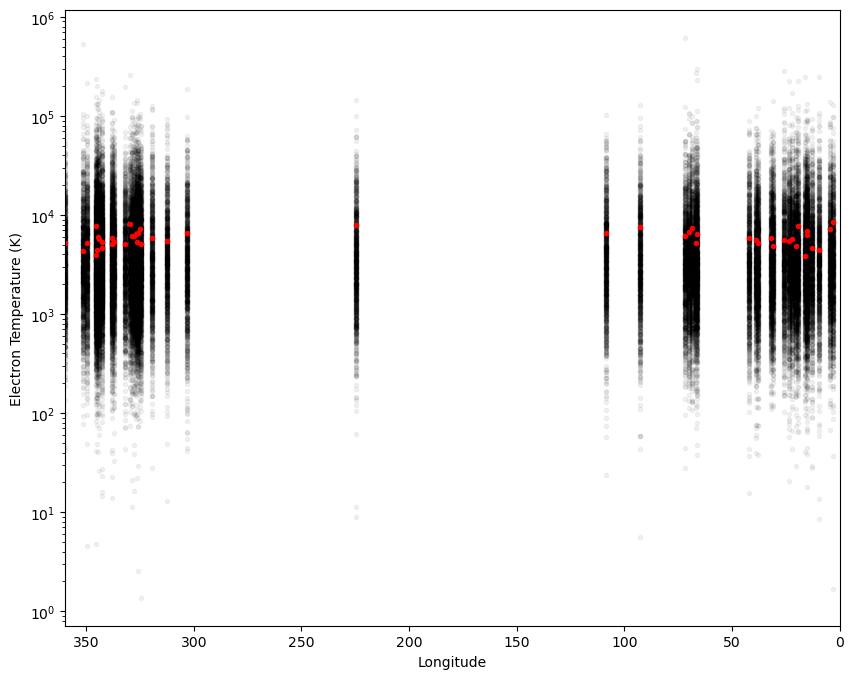

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in prior.prior_predictive.draw:
    ax.plot(
        data.loc[~data["te"].isna(), "glong"],
        prior.prior_predictive["te_observed"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["te"], "r.")
ax.set_yscale('log')
ax.set_xlabel("Longitude")
ax.set_ylabel("Electron Temperature (K)")
ax.set_xlim(360.0, 0.0)

In [56]:

from physiokinematic.simulate import simulate
hii_data = simulate(1000)  # Step 1: Simulate HII regions

In [57]:
hii_data

,glong,glat,vlsr,e_vlsr,radius,true_te,te,e_te,line,e_line,...,line_freq,telescope,beam_area,Rgal,distance,log10_n,log10_q,log10_Rs,log10_em,kdar
0,196.880302,-1.265708,34.938789,1.0,50.358890,8643.992363,8643.992363,100.0,6.205795,0.1,...,8000.0,simulated,9178.029287,16.056790,8.068556,1.761276,47.971891,0.294446,4.118028,
1,15.478401,0.162145,43.683669,1.0,92.755562,5441.602048,5441.602048,100.0,18.918105,0.1,...,8000.0,simulated,9178.029287,4.695894,12.029451,1.348982,48.463444,0.733160,3.732154,
2,345.592360,0.475399,-79.657642,1.0,169.423907,4325.342307,NaN,100.0,62.107755,0.1,...,8000.0,simulated,9178.029287,3.034269,5.655855,1.554029,48.675200,0.667047,4.076135,
3,37.511379,0.062208,36.667823,1.0,120.958300,6001.782030,NaN,100.0,59.961474,0.1,...,8000.0,simulated,9178.029287,6.661902,10.911034,1.600878,49.185984,0.806076,4.308862,
4,32.696571,0.325194,0.950869,1.0,69.674392,7105.046839,NaN,100.0,9.852088,0.1,...,8000.0,simulated,9178.029287,8.226051,13.815556,1.453071,48.479189,0.669016,3.876187,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,334.920030,-0.526374,-41.669465,1.0,111.648661,4979.530926,4979.530926,100.0,34.625042,0.1,...,8000.0,simulated,9178.029287,5.826577,12.083548,1.405090,48.823048,0.815622,3.926833,
996,8.007093,-0.683600,15.995955,1.0,213.438498,5202.449344,NaN,100.0,22.980687,0.1,...,8000.0,simulated,9178.029287,5.295043,13.258754,1.174021,49.326091,1.137350,3.786421,
997,21.552789,-0.353030,115.326958,1.0,124.846023,4776.517772,4776.517772,100.0,49.841447,0.1,...,8000.0,simulated,9178.029287,3.010117,7.843606,1.539444,48.674283,0.676465,4.056383,
998,348.678912,-0.670786,-87.928605,1.0,182.303611,4397.241896,NaN,100.0,31.425082,0.1,...,8000.0,simulated,9178.029287,2.074435,6.690932,1.360072,48.601712,0.771856,3.793030,


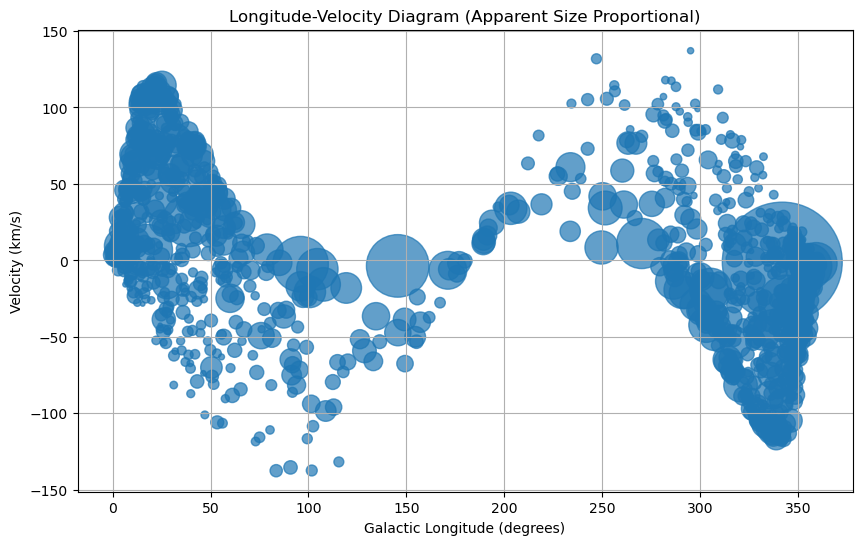

In [58]:
from physiokinematic import plot
plot.plot_longitude_velocity_diagram(hii_data)

In [59]:
import importlib
importlib.reload(plot)

<module 'physiokinematic.plot' from '/Users/ryanbakko/Desktop/Trey Research/physiokinematic/physiokinematic/plot.py'>

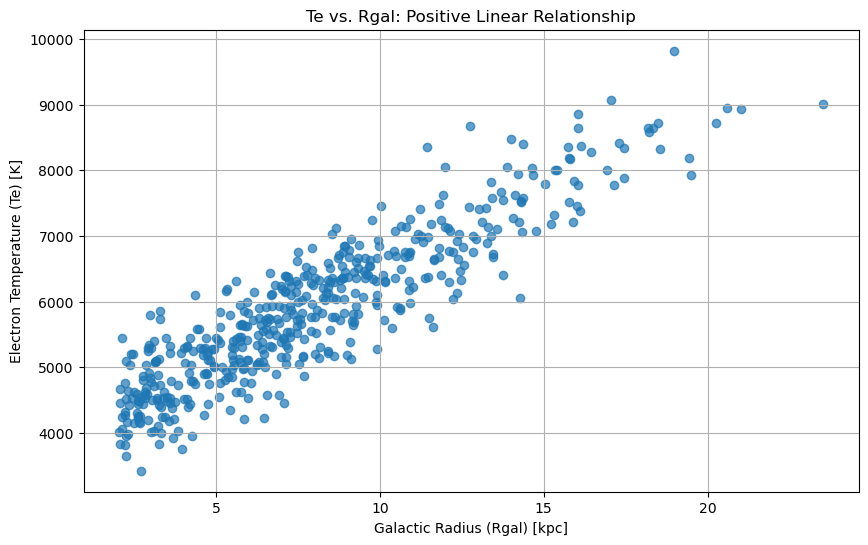

In [60]:
plot.plot_te_vs_rgal(hii_data)

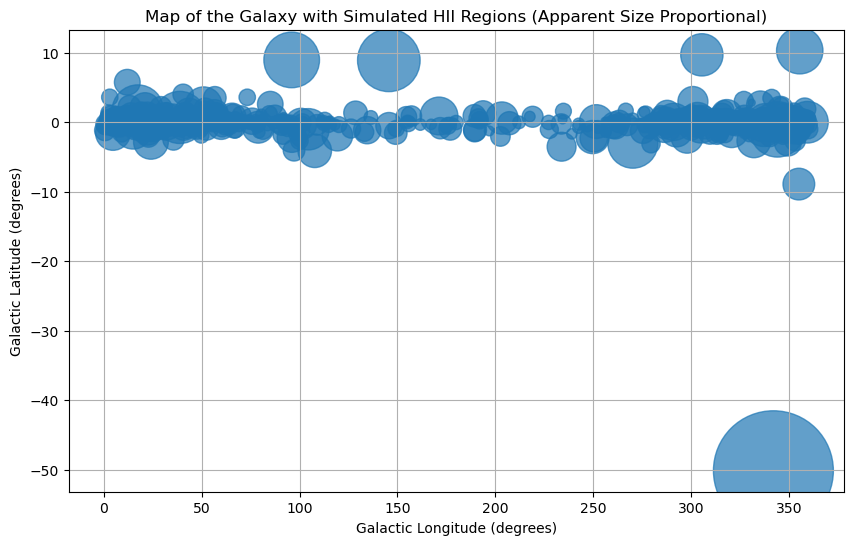

In [61]:
plot.plot_galaxy_map(hii_data)